In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D 

In [87]:
method_names = ['ipr', 'nrm', 'Bella_logreg', 'Forman_logreg', 'Vaz']
df_list = []

In [88]:
for m in method_names:
    df_tmp = pd.read_csv('results/sim_par_1/'+m+'_pi_target07.csv')
    df_tmp['method'] = m
    df_list.append(df_tmp)

In [89]:
df_list[4] = df_list[4].loc[:6,:]

In [90]:
df_list[4]

,n_plus,n_minus,n_target,pi_target,pi,var_n,var,seed,method
0,150,150,100.0,0.7,0.795187,0.003094,1.237515,0.0,Vaz
1,150,150,200.0,0.7,0.718933,0.001924,0.962030,0.0,Vaz
2,150,150,300.0,0.7,0.730889,0.001500,0.900240,0.0,Vaz
3,150,150,400.0,0.7,0.746518,0.001059,0.741518,0.0,Vaz
4,150,150,500.0,0.7,0.726953,0.000951,0.760722,0.0,Vaz
5,150,150,1000.0,0.7,0.718132,0.000647,0.840732,0.0,Vaz
6,150,150,1500.0,0.7,0.721607,0.000560,1.008171,0.0,Vaz


In [91]:
df = pd.concat(df_list, ignore_index=True)

<Axes: xlabel='n_target', ylabel='pi'>

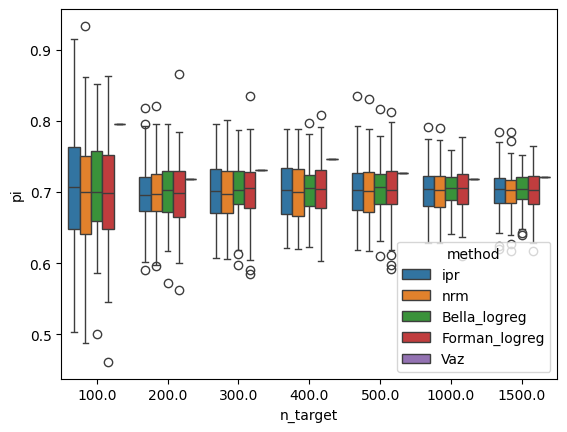

In [92]:
sns.boxplot(df, x='n_target', y='pi', hue='method')

In [93]:
df_var = df.groupby(['method', 'n_target']).agg(var_emp=('pi', lambda x: np.var(x, ddof=1))).reset_index()

In [94]:
df_merged = pd.merge(df, df_var, on=['n_target', 'method'], how='left')

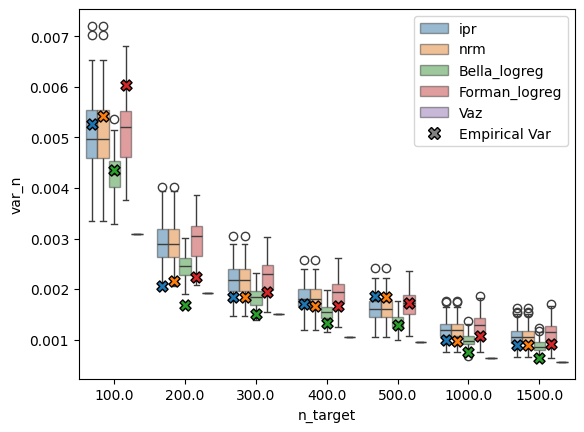

In [95]:
sns.boxplot(df_merged, x='n_target', y='var_n', hue='method', boxprops={'alpha':0.5})
sns.stripplot(data=df_merged[['n_target', 'method', 'var_emp']].drop_duplicates(), x='n_target', y='var_emp', hue='method',
              dodge=True, size=8, marker="X", edgecolor='black', linewidth=1)
# Fix duplicate legends
handles, labels = plt.gca().get_legend_handles_labels()
# Only keep one set of method handles
method_handles = handles[:len(df_merged['method'].unique())]
method_labels = labels[:len(df_merged['method'].unique())]

# Add a custom handle for empirical variance
empirical_handle = Line2D([0], [0], marker='X', color='w', label='Empirical variances',
                          markerfacecolor='gray', markersize=8, markeredgecolor='black')

# Combine legends
plt.legend(handles=method_handles + [empirical_handle],
           labels=method_labels + ['Empirical Var'])
plt.show()
